# Programmer votre IA pour acheter votre voiture

Vous travaillez depuis un an en tant qu'expert en data et avez économisé assez d'argent
pour acheter une voiture. En tant qu'expert en données et étant assez économe, vous
voulez en avoir pour votre argent !!!
Imaginez que vous ayez également des données du site Web de voitures CarDekho, qui
contient des informations sur une grande variété de voitures, y compris leur prix. Vous
réalisez que vous pouvez utiliser ces données pour vous assurer d'obtenir une bonne affaire
sur une nouvelle voiture. En particulier, vous pouvez déterminer exactement combien vous
devriez payer pour un type de voiture spécifique. Cela peut être particulièrement utile si vous
rencontrez un vendeur de voitures difficile!
Mais la question est de savoir comment utiliser les données pour déterminer combien vous
devriez payer ?

## 1. La première étape est la récupération des données.
Nous utiliserons la bibliothèque de science des données appelée Pandas pour charger
l'ensemble des données. Au travers de Pandas, il est possible de lire le fichier de données
(carData.csv). Les données seront ensuite affectées et stockées dans une variable, par
exemple : car_data.

In [23]:
import pandas as pd

car_data = pd.read_csv('./carData.csv')
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## 2. Explorer les données.
Parcourir les colonnes pour s'approprier les données. Quelle est la taille du jeux de
données. Calculer quelques statistiques de base (moyenne, médiane, quartile, tracer la
distribution avec Matplotlib (histogramme).

In [24]:
import pandas as pd

df = pd.read_csv('./carData.csv')
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3056d5ad10>,
      dtype=object)

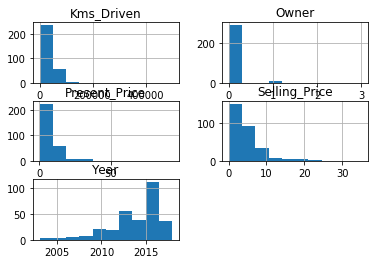

In [25]:
# histogramme
df.hist()

## 3. Charger vos données dans une base de données MySQL. A partir de cette question, vos données devront être récupérées directement via la base de données.

### Création de la database et la table
```
use dataAi;

drop table if exists cardata;

create table cardata(
Car_Name VARCHAR(50)
,Year INT(4)
,Selling_Price FLOAT(4)
,Present_Price FLOAT(4)
,Kms_Driven INT(10)
,Fuel_Type VARCHAR(50) 
,Seller_Type VARCHAR(50)
,Transmission VARCHAR(50)
,Owner INT(5)
,Fuel_TypeInt INT(3)
,Seller_Bool TINYINT(1)
,Transmission_Bool TINYINT(1)
)
; 
```

In [26]:
# Import des données avec Python

from sqlalchemy import create_engine
import pandas as pd
import time


engine = create_engine("mysql+pymysql://root@localhost/dataAi")

import_column = "Car_Name   Year    Selling_Price   Present_Price   Kms_Driven    Fuel_Type     Seller_Type     Transmission    Owner    Fuel_TypeInt   Seller_Bool    Transmission_Bool"

def chargement(x, link, table):
    
    print("Lecture des données")
    col = x.split()
    start_time = time.time()
    df = pd.read_csv(link, encoding="UTF-8")
    df.columns = col
    print("Données lu")
    df.to_sql(table, con = engine, if_exists='append', index=False)
    return print("Temps d execution : %s secondes." % (time.time() - start_time))

# Data cleaning on passe des bolean pour Transmission, SellerType et du Int pour Fuel.
# df2 = pd.read_csv('./carData.csv')

# df2['Fuel_TypeInt'] = df2['Fuel_Type'].replace({'Petrol':0, 'CNG':1, 'Diesel':2})
# df2['Seller_Bool'] = df2['Seller_Type'].astype('category').cat.codes
# df2['Transmission_Bool'] = df2['Transmission'].replace({'Manual':1, 'Automatic':0})

# df2.to_csv('./carData2.csv',index=False)


chargement(import_column,'./carData2.csv', 'cardata')





Lecture des données
Données lu
Temps d execution : 0.04199838638305664 secondes.


### 4. Visualiser les données grâce à la librairie Seaborn.
Notamment avec le type de tracé `catplot`, expliquer dans quel cas ce type de tracé est
pertinent.

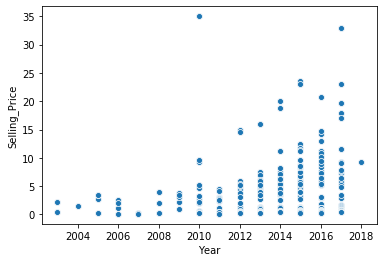

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_sql_table('cardata',engine)

sns.scatterplot(x = 'Year', y = 'Selling_Price', data = df)

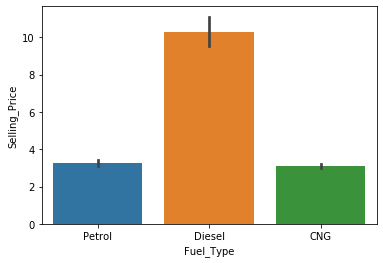

In [28]:

ax = sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)
# ax.set(xlim=(10,40))

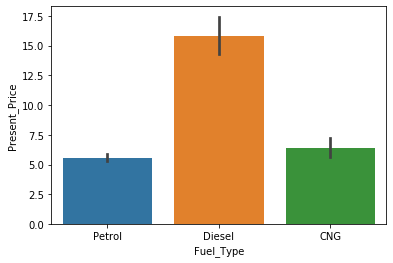

In [29]:
ax = sns.barplot(x='Fuel_Type', y='Present_Price', data=df)

In [44]:
# sns.distplot('Fuel_TypeInt', kde = True)
# sns.pairplot(df, hue ='Seller_Bool', bw=1.5)

ValueError: could not convert string to float: 'Fuel_TypeInt'